In [ ]:
! pip install -q kaggle


In [ ]:
! mkdir ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle/


cp: cannot stat 'kaggle.json': No such file or directory


In [1]:
!kaggle datasets download -d 'masoudnickparvar/white-blood-cells-dataset'

Dataset URL: https://www.kaggle.com/datasets/masoudnickparvar/white-blood-cells-dataset
License(s): copyright-authors
100% 499M/499M [00:28<00:00, 21.4MB/s]
100% 499M/499M [00:28<00:00, 18.5MB/s]


In [2]:
import zipfile
dataset = zipfile.ZipFile('white-blood-cells-dataset.zip', 'r')
dataset.extractall()
dataset.close()

In [4]:
import os
os.listdir('Train')

['Neutrophil', 'Lymphocyte', 'Monocyte', 'Eosinophil', 'Basophil']

In [ ]:
pip install tensorflow==2.15.0


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 76.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 51.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 108.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 34.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 7.6 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.16.0
    Uninstalling wrapt-1.16.0:
      Successfully uninstalled wrapt-1.16.0
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstalling keras-3.4.1:
      Successfully uninstalled keras-3.4.1
  Attempting uninstall: tensorboard
    Found existing installatio

In [5]:
# Direct
dataset_dir = 'Train'

In [6]:
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Path to dataset directory
dataset_dir = 'Train'

In [7]:
# Image data generator for preprocessing
datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

In [8]:
# Load and preprocess the dataset
generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)


Found 10175 images belonging to 5 classes.


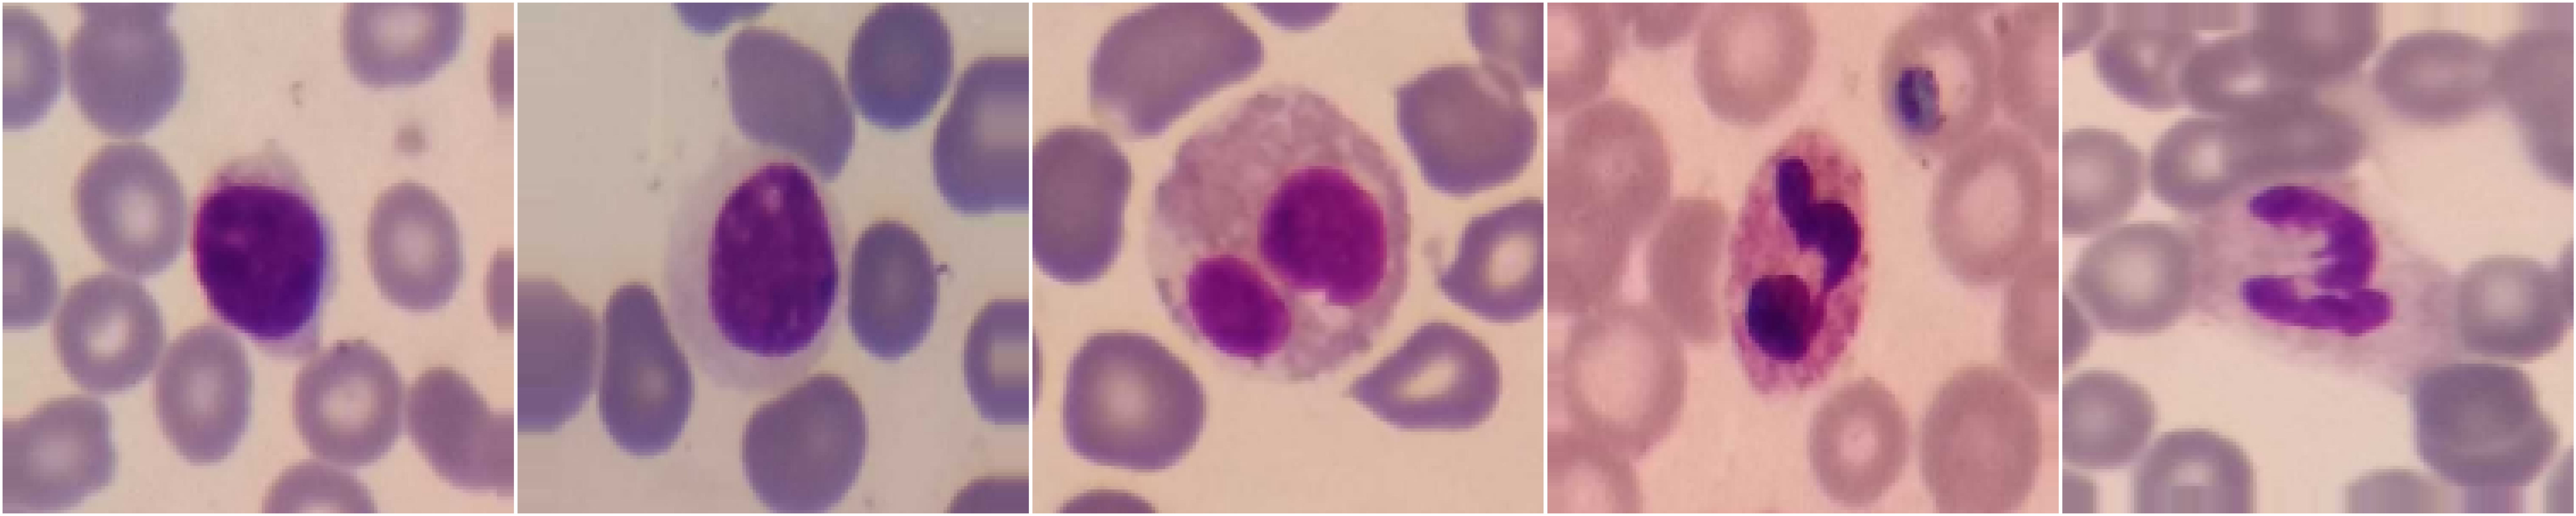

In [9]:
# Display some preprocessed images
def plot_images(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(100, 100))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

# Get a batch of images
images, labels = next(generator)

# Plot the images
plot_images(images)

In [14]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# Path ke direktori dataset
dataset_dir = 'Train'

# Parameter
img_height, img_width = 224, 224
batch_size = 64

# Membagi dataset menjadi train dan validation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,  # 80% train, 20% validation
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

validation_generator = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

# Menampilkan label
print("Label mapping:", train_generator.class_indices)


Found 8142 images belonging to 5 classes.
Found 2033 images belonging to 5 classes.
Label mapping: {'Basophil': 0, 'Eosinophil': 1, 'Lymphocyte': 2, 'Monocyte': 3, 'Neutrophil': 4}


In [15]:
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import InceptionV3  # Mengganti ke Inception v4 (InceptionV4 tidak tersedia secara langsung di Keras)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
import tensorflow as tf

# Path to dataset directory
dataset_dir = 'Train'

# Image dimensions
img_height, img_width = 299, 299  # Inception v4 memerlukan ukuran gambar yang lebih besar

# Image data generators for preprocessing and augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2,  # Split for validation
    preprocessing_function=lambda x: tf.image.rgb_to_grayscale(x)  # Convert to grayscale
)

validation_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,  # Split for validation
    preprocessing_function=lambda x: tf.image.rgb_to_grayscale(x)  # Convert to grayscale
)

train_generator = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=(img_height, img_width),
    batch_size=32,
    class_mode='categorical',
    color_mode='rgb',  # Load images as RGB
    subset='training'
)

validation_generator = validation_datagen.flow_from_directory(
    dataset_dir,
    target_size=(img_height, img_width),
    batch_size=32,
    class_mode='categorical',
    color_mode='rgb',  # Load images as RGB
    subset='validation'
)

# Check if generators are created successfully
if train_generator is None or validation_generator is None:
    raise ValueError("Error in creating data generators. Please check the dataset directory and parameters.")

# Load pre-trained InceptionV3 model without top layers (digunakan sebagai alternatif untuk Inception v4)
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Freeze the base_model layers
base_model.trainable = False

# Build the model
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.5),
    Dense(5, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train model
try:
    history = model.fit(
        train_generator,
        steps_per_epoch=train_generator.samples // train_generator.batch_size,
        validation_data=validation_generator,
        validation_steps=validation_generator.samples // validation_generator.batch_size,
        epochs=10
    )
except Exception as e:
    print(f"Error during model training: {e}")

# Evaluate model
try:
    loss, accuracy = model.evaluate(validation_generator)
    print(f'Validation Loss: {loss}')
    print(f'Validation Accuracy: {accuracy}')
except Exception as e:
    print(f"Error during model evaluation: {e}")

# Make predictions
try:
    predictions = model.predict(validation_generator)
    print(predictions)
except Exception as e:
    print(f"Error during model prediction: {e}")


Found 8142 images belonging to 5 classes.
Found 2033 images belonging to 5 classes.
Epoch 1/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 272s 1s/step - accuracy: 0.6605 - loss: 0.9944 - val_accuracy: 0.7684 - val_loss: 0.6487
Epoch 2/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 18s 71ms/step - accuracy: 0.7188 - loss: 0.8222 - val_accuracy: 0.8235 - val_loss: 0.3475
Epoch 3/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 265s 871ms/step - accuracy: 0.8129 - loss: 0.5309 - val_accuracy: 0.7758 - val_loss: 0.6474
Epoch 4/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9688 - loss: 0.1530 - val_accuracy: 0.6471 - val_loss: 0.7406
Epoch 5/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 227s 876ms/step - accuracy: 0.8402 - loss: 0.4564 - val_accuracy: 0.7822 - val_loss: 0.6302
Epoch 6/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9062 - loss: 0.3602 - val_accuracy: 0.6471 - val_loss: 0.7231
Epoch 7/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 261s 876ms/step - accuracy: 0.8564 - loss: 0.4059 - val_accuracy: 0.7981 - val_loss: 0.5919
Epoch

In [16]:
import matplotlib.pyplot as plt
import numpy as np

def plot_images(images_arr, true_labels, pred_labels, class_indices):
    """
    Menampilkan gambar dengan label asli dan label yang diprediksi.

    Parameters:
        images_arr (numpy array): Array gambar.
        true_labels (numpy array): Array label asli.
        pred_labels (numpy array): Array label yang diprediksi.
        class_indices (dict): Mapping dari nama kelas ke indeks.
    """
    class_names = {v: k for k, v in class_indices.items()}

    plt.figure(figsize=(15, 15))
    for i in range(len(images_arr)):
        ax = plt.subplot(1, len(images_arr), i + 1)
        plt.imshow(images_arr[i])
        true_label = class_names[np.argmax(true_labels[i])]
        pred_label = class_names[np.argmax(pred_labels[i])]
        title_color = 'green' if true_label == pred_label else 'red'
        ax.set_title(f"True: {true_label}\nPred: {pred_label}", color=title_color, fontsize=12)
        plt.axis('off')
    plt.tight_layout()
    plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━

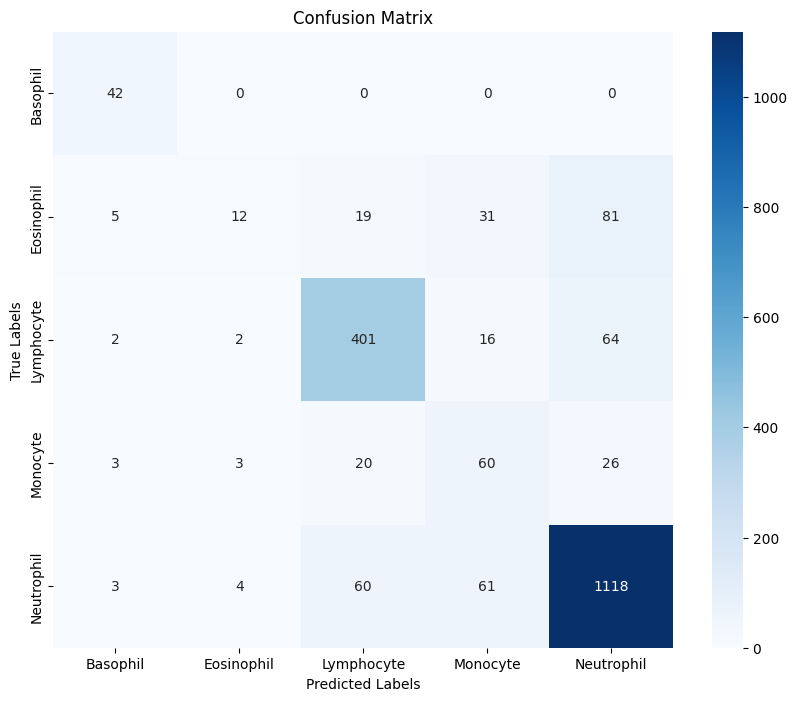

Classification Report:

              precision    recall  f1-score   support

    Basophil       0.76      1.00      0.87        42
  Eosinophil       0.57      0.08      0.14       148
  Lymphocyte       0.80      0.83      0.81       485
    Monocyte       0.36      0.54      0.43       112
  Neutrophil       0.87      0.90      0.88      1246

    accuracy                           0.80      2033
   macro avg       0.67      0.67      0.63      2033
weighted avg       0.80      0.80      0.79      2033



In [18]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Mendapatkan semua label dan prediksi dari validation generator
def get_all_predictions(generator, model):
    """
    Mendapatkan semua prediksi dan label dari generator.

    Parameters:
        generator (ImageDataGenerator): Generator gambar.
        model (tf.keras.Model): Model yang telah dilatih.

    Returns:
        Tuple of numpy arrays: (all_true_labels, all_predictions)
    """
    all_true_labels = []
    all_predictions = []

    # Reset generator sebelum iterasi
    generator.reset()

    for _ in range(len(generator)):
        images, labels = next(generator)
        preds = model.predict(images)
        all_true_labels.extend(np.argmax(labels, axis=1))
        all_predictions.extend(np.argmax(preds, axis=1))

    return np.array(all_true_labels), np.array(all_predictions)

# Mendapatkan semua label dan prediksi
true_labels, pred_labels = get_all_predictions(validation_generator, model)

# Membuat Confusion Matrix
cm = confusion_matrix(true_labels, pred_labels)
class_names_list = list(class_indices.keys())

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names_list,
            yticklabels=class_names_list)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Menampilkan Classification Report
print("Classification Report:\n")
print(classification_report(true_labels, pred_labels, target_names=class_names_list))


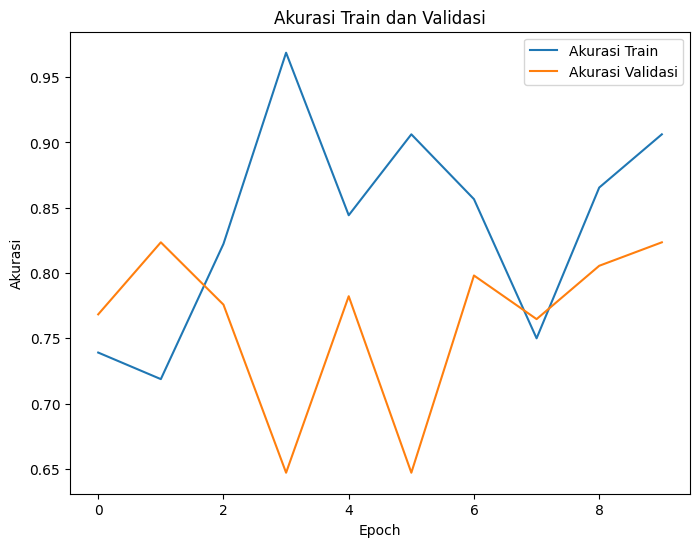

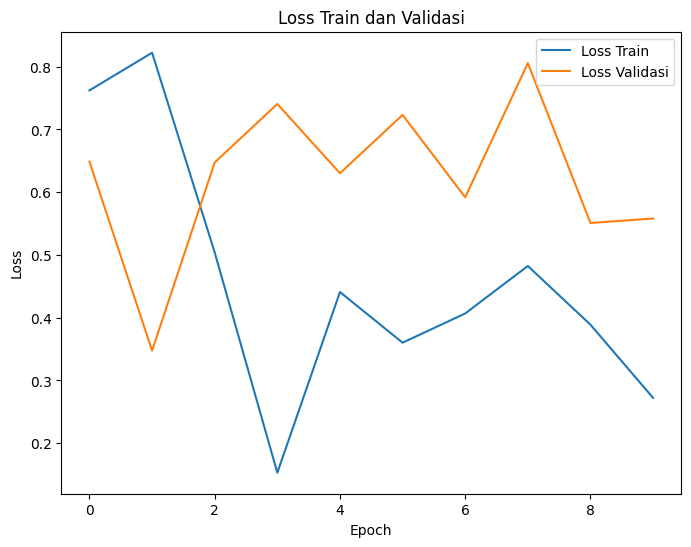

In [19]:
import matplotlib.pyplot as plt

# Plot akurasi
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Akurasi Train')
plt.plot(history.history['val_accuracy'], label='Akurasi Validasi')
plt.title('Akurasi Train dan Validasi')
plt.xlabel('Epoch')
plt.ylabel('Akurasi')
plt.legend()
plt.show()

# Plot loss
plt.figure(figsize=(8, 6)


           )
plt.plot(history.history['loss'], label='Loss Train')
plt.plot(history.history['val_loss'], label='Loss Validasi')
plt.title('Loss Train dan Validasi')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
